# Интернет-магазин "Стримчик"

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных из файла 

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats as st 
from functools import reduce
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('/home/cookie/projects/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [5]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Вывод**

Есть пропуски в столбцах с годом выпуска, оценкой критиков и пользователей, и рейтингом. Сюдя по всему в столбце с оценкой пользователей некоторые значения NaN является типом данных object и поэтому не воспринимается питоном как пропуск 

Значения 'tbd' в столбце с оценками пользователей расшифровывается как "to be discussed" и означает, что на момент выгрузки данных оценка пользователей была не известна  

## Подготовка данных 

In [6]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [7]:
df['year_of_release'] = df['year_of_release'].astype(dtype='Int64')
df['critic_score'] = df['critic_score'].astype(dtype='Int64')

In [8]:
try:
    df['user_score'] = pd.to_numeric(df['user_date'], errors='coerce')
except:
    df['user_score'] == 'tbd'

In [9]:
try:
    df['user_score'] = df['user_score'].astype('float')
except:
    df['user_score'] == 'tbd'

In [10]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


Заменил значения в столбцах с годом релиза и оценкой критиков на целочисленные значения, потому что в этих значениях нету смысла от дробей. Нас интересует весь год, а не его часть. Оценка критиков идет от 0 до 100, поэтому не имеет смысла быть записаной дробью 

Пропуски решил, пока, не заполнять, так-как не известно что влияет на оценку критиков/пользователей. Год релиза и возрастной рейтинг, конечно можно найти на просторах интернета, но делать это для всех значений как то трудоемко    



In [12]:
def total_sales(row):
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    
    result = na_sales + eu_sales + jp_sales + other_sales
    return result 

In [13]:
df['total_sales'] = df.apply(total_sales, axis=1)

## Исследовательский анализ данных

### Сколько игр выпскалось в разные годы 

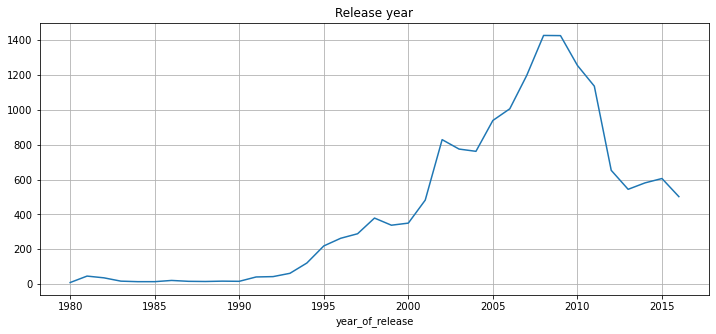

In [55]:
df.groupby('year_of_release')['year_of_release'].count().plot(grid=True, figsize=(12,5))
plt.title('Release year')
plt.show()

**Вывод**

Начиная c 1995 года количество выпущенных игр начало расти и в 2007-2008 годах достигло пика после чего полшо на спад.

Думаю что данные за все периоды не важны. В 2013 году график выравнивается, поэтому можно считать этот отрезок как **актуальный период**

### Продажи по платформам 

In [15]:
top_platforms = (df
.pivot_table(index='platform', values='total_sales', aggfunc='sum')
.sort_values(by='total_sales', ascending=False))

In [16]:
top_platforms = top_platforms.reset_index(level=0)

In [17]:
top_platforms = top_platforms['platform'].head(10).to_list()

Text(0, 0.5, 'sales_mln')

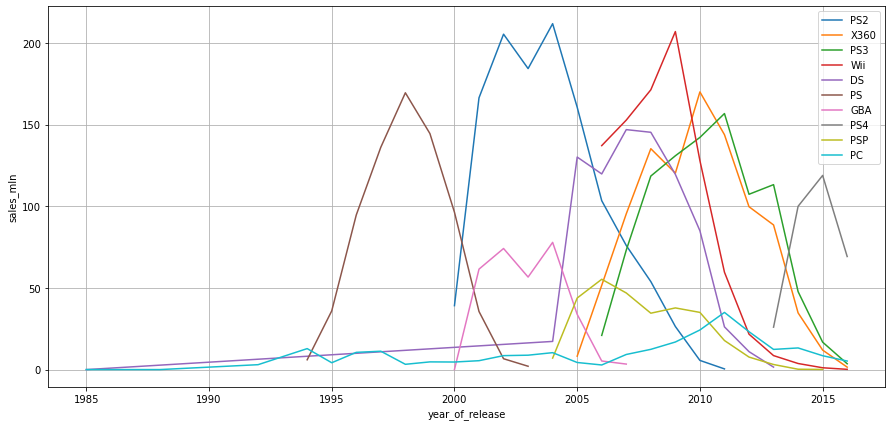

In [18]:
for platform in top_platforms:
    (df[df['platform']==platform]
     .groupby('year_of_release')['total_sales'].sum()
     .plot(grid=True, figsize=(15,7))
    )
plt.legend(top_platforms)   
plt.ylabel('sales_mln')

**Вывод**

Судя по всему большинстов платформ "живут" примерно 10 лет 

### Данные за "актуальный" период 

#### Какие платформы лидируют по продажам?

In [19]:
df_year_cut = df.query('year_of_release >= 2013', engine='python')

In [20]:
df_year_cut.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

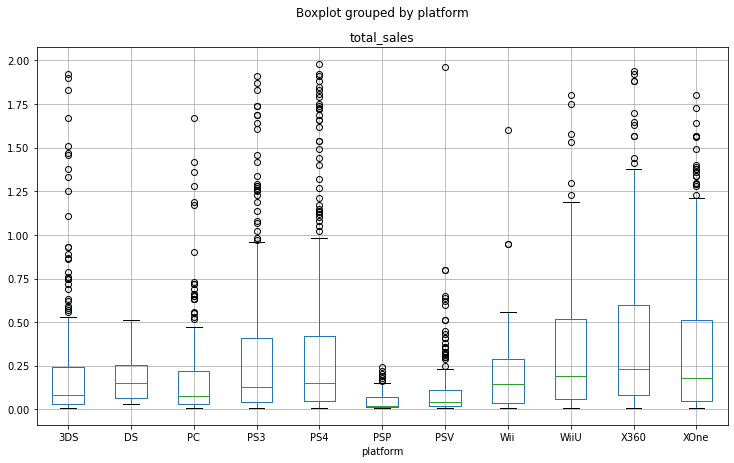

In [21]:
(df_year_cut
 .query('total_sales < 2')
 .boxplot(column='total_sales', by='platform', figsize=(12,7))
)

**Вывод**

По продажам лидируют платформы PS4, PS3 и Xbox One. Медианное значение продаж у Xbox 360 выше чем у отсальных. Скорее всего это связяано, что это "устоявшиеся" платформы с хорошей репутацией. У PSP дела совсем плохи 

#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [23]:
df_test = df_year_cut.query('user_score != "tbd"')

In [24]:
df_test['user_score'] = df_test['user_score'].astype('float64')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

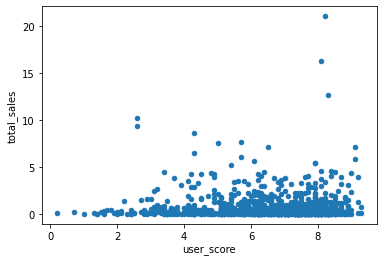

In [25]:
df_test.plot(x='user_score', y='total_sales', kind='scatter')

In [26]:
df_test['user_score'].corr(df_test['total_sales'])

-0.002607813354598235

In [27]:
df_test['critic_score'] = df_test['critic_score'].astype('float64')

In [28]:
df_test['critic_score'].corr(df_test['total_sales'])

0.3136995151027368

Text(0, 0.5, 'sales_mln')

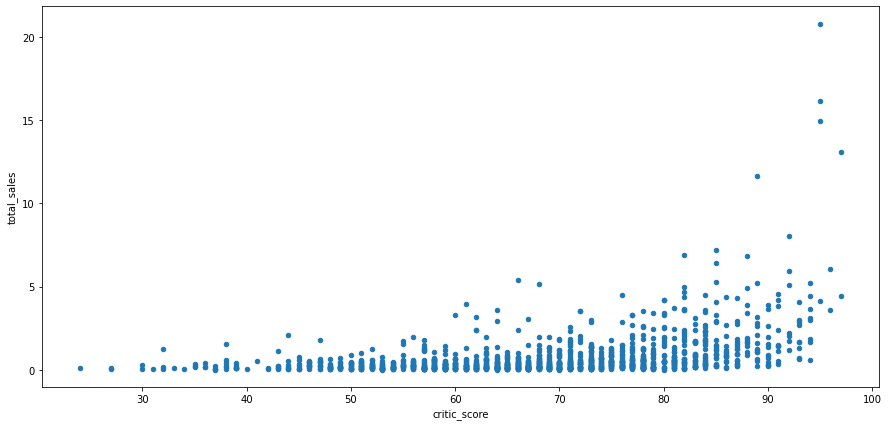

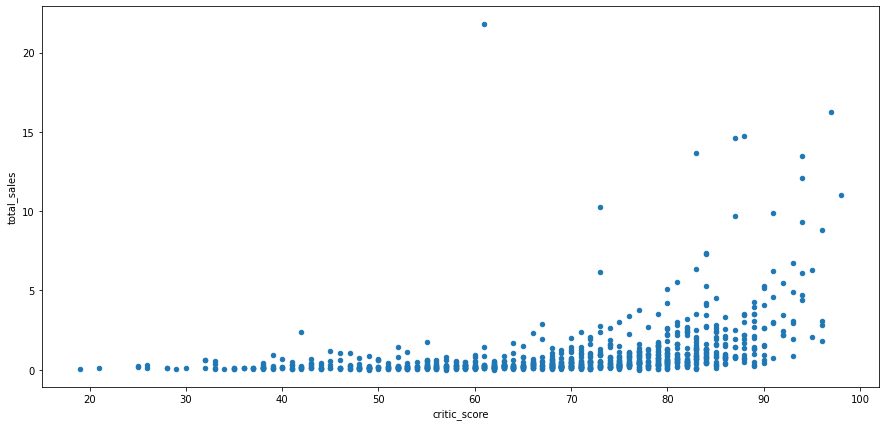

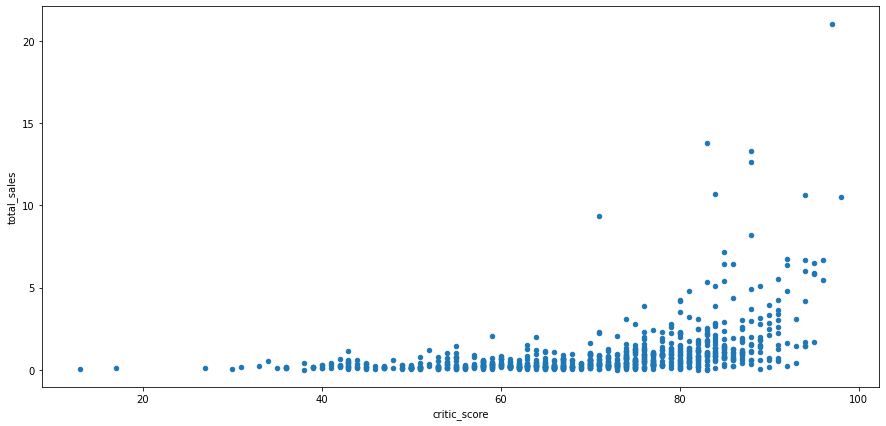

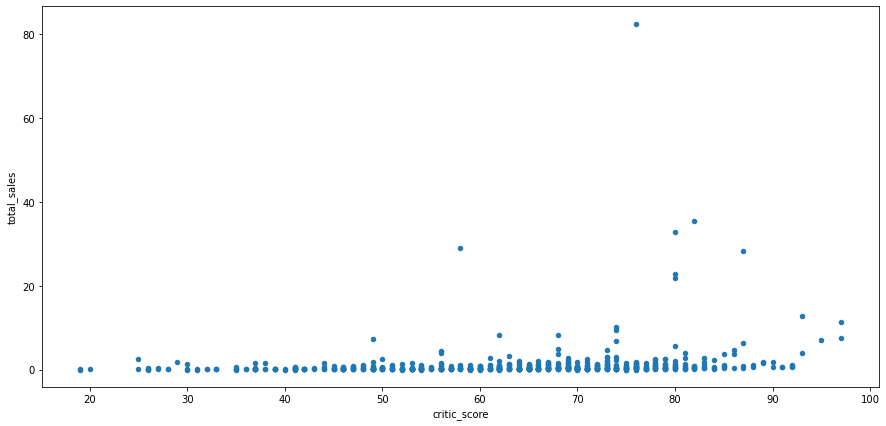

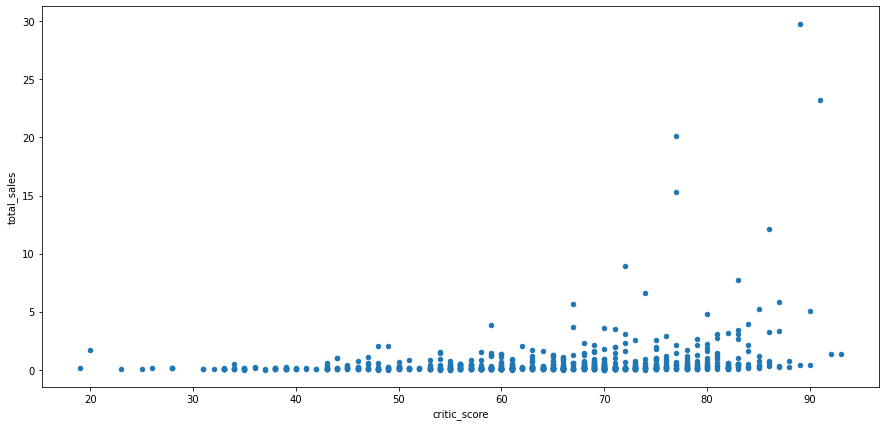

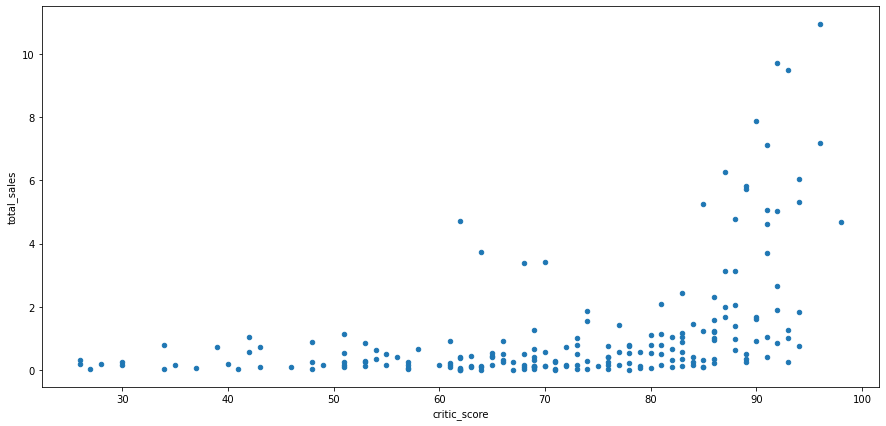

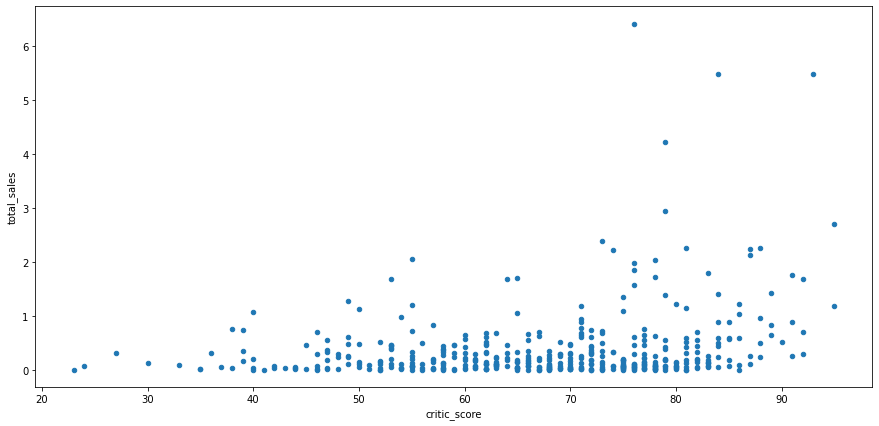

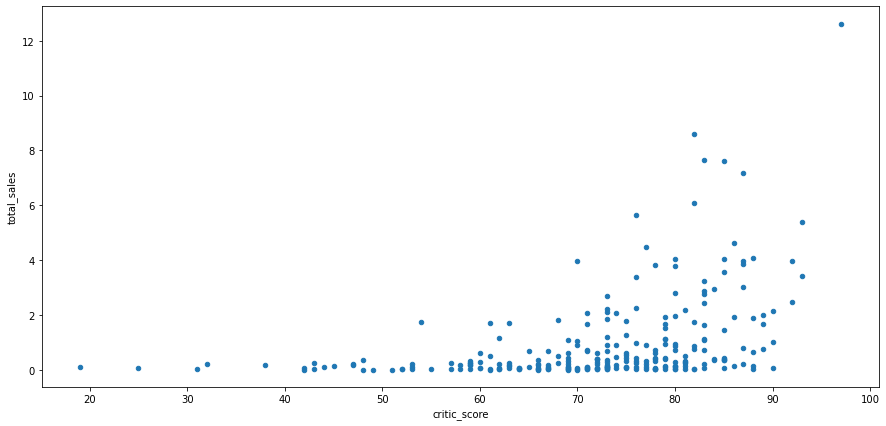

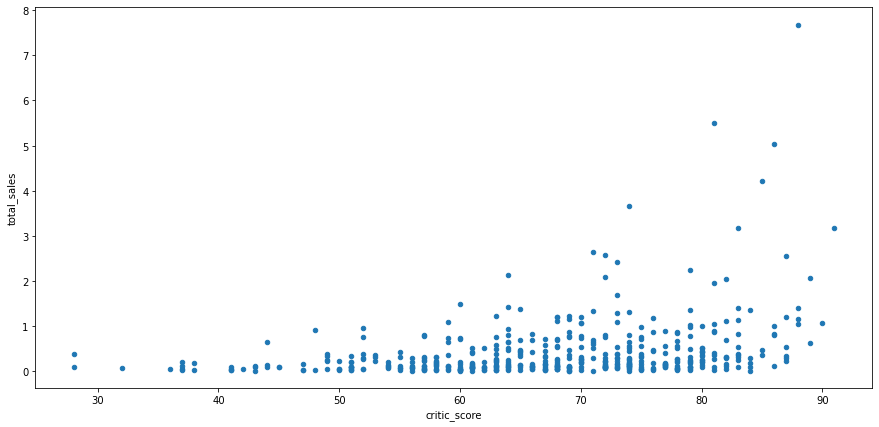

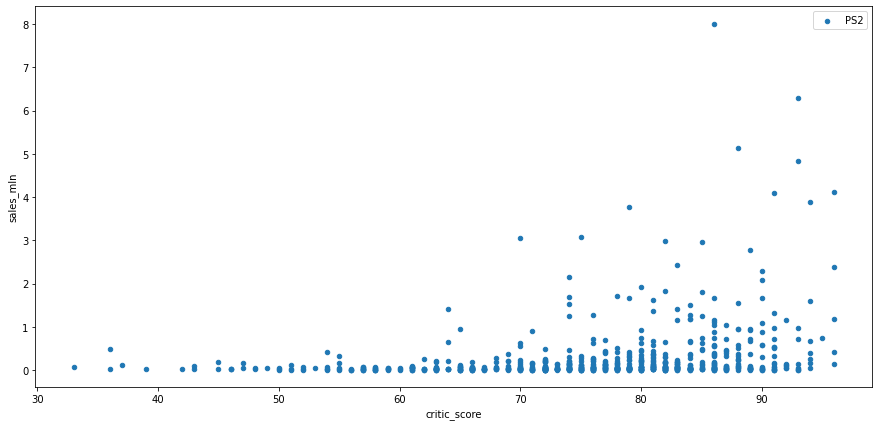

In [29]:
for platform in top_platforms:
    (df[df['platform']==platform]
     .plot(x='critic_score',y='total_sales',kind='scatter', figsize=(15,7))
    )
plt.legend(top_platforms)   
plt.ylabel('sales_mln')


**Вывод**

Судя по всему оценка критиков влияет на продаже больше, чем оценка пользователей 

#### Общее распределение игр по жанрам

In [30]:
df_test['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

In [31]:
df_test.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


<AxesSubplot:ylabel='total_sales'>

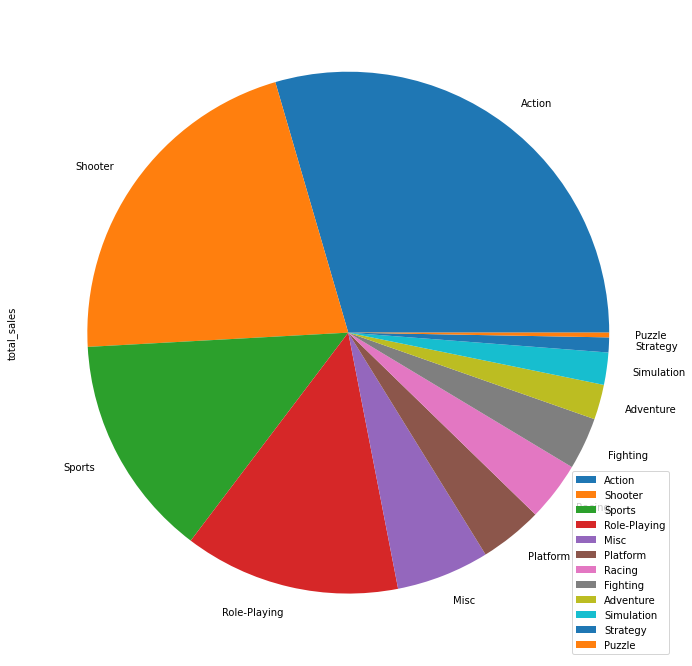

In [32]:
(df_test
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot(y='total_sales', kind='pie', figsize=(12,12))
)


**Вывод**

Самые продаваемые жанры Action, Shooter, Sports и Role-Playing. остальные жанры приносят заметно меньше и жанр "головоломки" приносит наименьшее количество прибыли 

##  Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5)

In [33]:
['na_sales', 'eu_sales', 'jp_sales']

['na_sales', 'eu_sales', 'jp_sales']

In [34]:
(df_test.pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
.head(5)
)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [35]:
(df_test.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
.head(5)
)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [36]:
(df_test.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
.head(5)
)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


**Вывод**

В Америке и Европе пердпочтения по платформам примерно одинаковое. В Японии самая продаваемая платформа 3DS, а в Америке и Европе она является наименее популярной

### Самые популярные жанры (топ-5)

In [37]:
(df_test.pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
.head(5)
)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [38]:
(df_test.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
.head(5)
)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [39]:
(df_test.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
.head(5)
)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


**Вывод** 

В Америке и Европе предпочтения по жанрам, можно сказать, одинаковое. В Японии отдают предпочтения жанру Role-Playing

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [40]:
(df_test.pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
)

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


In [41]:
(df_test.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
)

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


In [42]:
(df_test.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
)

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


**Вывод**

В Америке и Европе самые продоваемые игры с рейтингом М. В Японии продпочитают игры с рейтингом Т.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [43]:
xone = df_test.query('platform == "XOne"').dropna()
pc = df_test.query('platform == "PC"').dropna()

In [44]:
xone_rating = xone['user_score'].to_list()
pc_rating = pc['user_score'].to_list()

In [45]:
alpha = .05

In [46]:
results = st.ttest_ind(xone_rating, pc_rating, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

p-значение:  0.14104275299383137
Не получилось отвергнуть нулевую гипотезу




H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


H₁ -  Средние пользовательские рейтинги платформ Xbox One и PC различаются

### Средние пользовательские рейтинги жанров Action и Sports разные

In [47]:
action = df_test.query('genre == "Action"').dropna()
sports = df_test.query('genre == "Sports"').dropna()

In [48]:
action_rating = action['user_score'].tolist()
sports_rating = sports['user_score'].tolist()

In [49]:
alpha = .05

In [50]:
results = st.ttest_ind(action_rating, sports_rating, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-значение:  7.136312729062867e-13
Отвергаем нулевую гипотезу


H₀ - Средние пользовательские рейтинги жанров Action и Sports одинаковые 

H₁ - Средние пользовательские рейтинги платформ Action и Sports различаются 

### Платформы 

<AxesSubplot:ylabel='Frequency'>

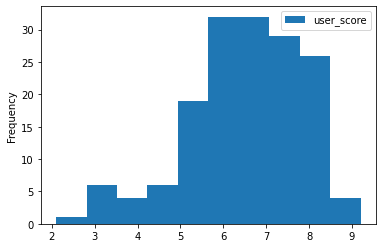

In [51]:
xone.sort_values(by='user_score').plot(x='platform', y='user_score', kind='hist')

<AxesSubplot:ylabel='Frequency'>

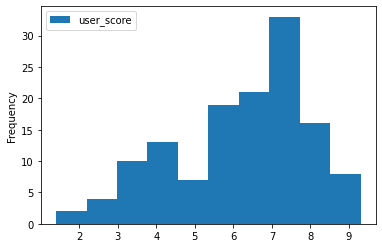

In [52]:
pc.sort_values(by='user_score').plot(x='platform', y='user_score', kind='hist')

### Жанры

<AxesSubplot:ylabel='Frequency'>

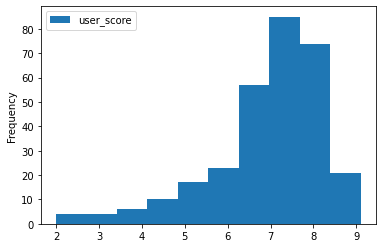

In [53]:
action.sort_values(by='user_score').plot(x='genre', y='user_score', kind='hist')

<AxesSubplot:ylabel='Frequency'>

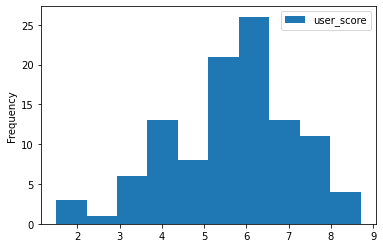

In [54]:
sports.sort_values(by='user_score').plot(x='genre', y='user_score', kind='hist')

# Общий вывод

Для Европы и Америки самыми популярными продуктами являются платформы PS4 и Xbox One и игры жанра Action с рейтингом М. 

В Японии предпочитают платформу 3DS и PS3 и игры жанра Role-Playing с рейтингом Т

Средний пользовательский рейтинг на PC и Xbox не отличается. Скорее всего связано с тем, что хоть платформы и разные, но на них все равно играют в одни и те же игры, поэтому и рейтинг будет одинаковый.

Средний пользовательский рейтинг жанра Action и Sports отличается. Думаю это связано с тем, что в жанре Action больше игр и то что пользователи в общем отдают препочтение жанру Action.